In [1]:
!pip install ragas==0.1.7
!pip install langchain==0.1.16
!pip install unstructured
!pip install python-magic-bin
!pip install llama-index qdrant_client torch transformers

!pip install llama-index-embeddings-huggingface

!pip install llama-index-llms-ollama

!pip install llama-index-vector-stores-qdrant

!pip install llama-index-embeddings-fastembed



ERROR: Could not find a version that satisfies the requirement python-magic-bin (from versions: none)
ERROR: No matching distribution found for python-magic-bin


In [85]:
!pip install colab-xterm
%load_ext colabxterm
%xterm


The colabxterm extension is already loaded. To reload it, use:
  %reload_ext colabxterm


Launching Xterm...

<IPython.core.display.Javascript object>


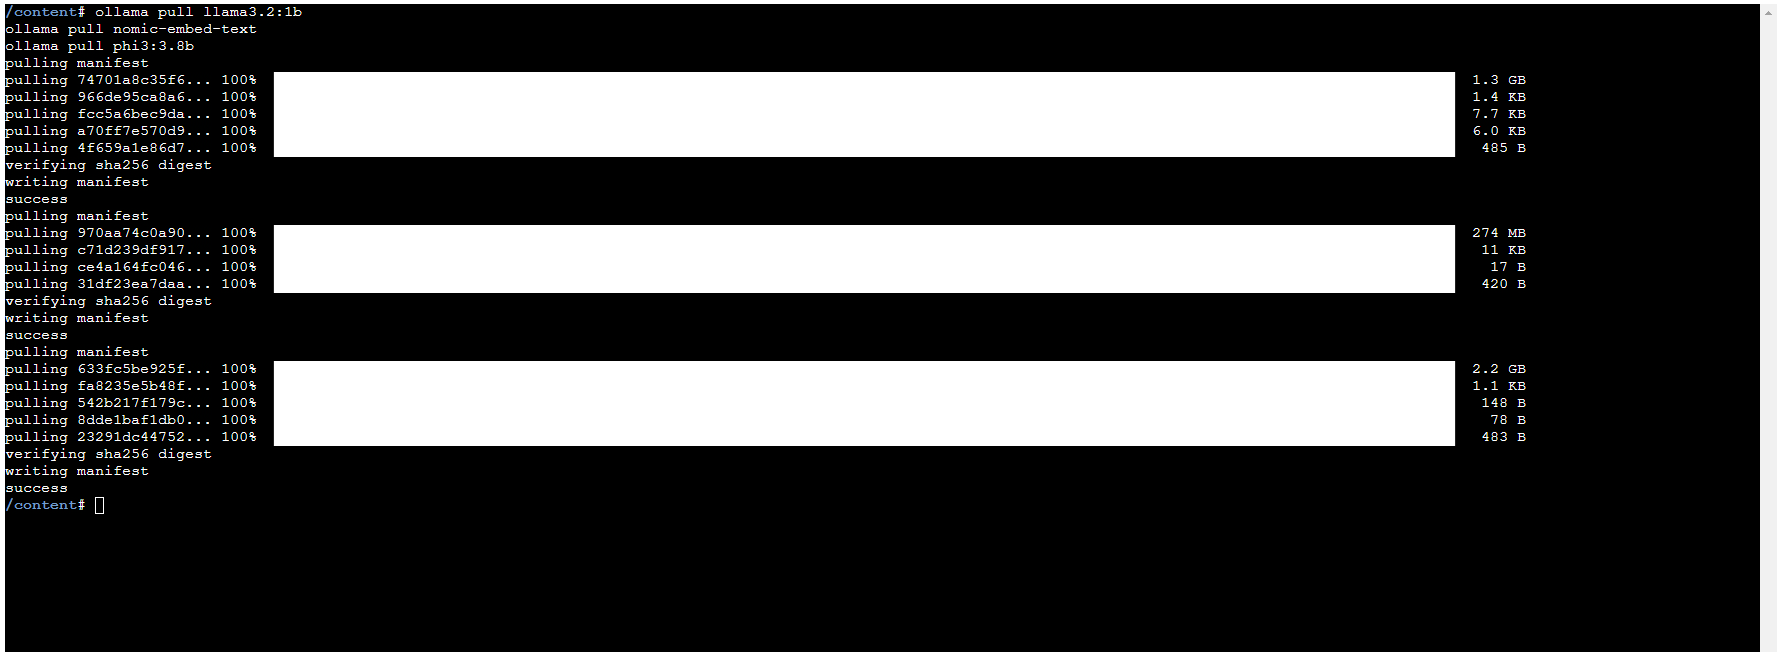
```
# This has done above to download and install ollama and models
curl https://ollama.ai/install.sh | sh
ollama serve &
ollama pull llama3.2:1b
ollama pull nomic-embed-text
ollama pull phi3:3.8b

```



In [2]:
import nest_asyncio
import qdrant_client

from llama_index.core import Settings
from llama_index.core import PromptTemplate
from llama_index.llms.ollama import Ollama
from llama_index.core import StorageContext
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core.postprocessor import SentenceTransformerRerank
from llama_index.embeddings.fastembed import FastEmbedEmbedding
from llama_index.vector_stores.qdrant import QdrantVectorStore

from IPython.display import Markdown, display
import pandas as pd
import nest_asyncio

nest_asyncio.apply()

In [ ]:
llm = Ollama(model="llama3.2:1b", request_timeout=120.0)

embed_model = FastEmbedEmbedding(model_name="BAAI/bge-large-en-v1.5")

rerank = SentenceTransformerRerank(model="BAAI/bge-reranker-base", top_n=2)

In [4]:
Settings.embed_model = embed_model

Settings.llm = llm

In [5]:
input_dir_path = '/content/drive/MyDrive/Colab Notebooks/paul_graham'

loader = SimpleDirectoryReader(
            input_dir = input_dir_path,
            required_exts=[".txt"],
            recursive=True
        )
docs = loader.load_data()

In [6]:
client = qdrant_client.QdrantClient(host="743e-2409-40e1-10fa-871f-c15e-a78b-c2b8-1a94.ngrok-free.app", port=443, https=True)


vector_store = QdrantVectorStore(client=client,
                                 collection_name="document_chat")

storage_context = StorageContext.from_defaults(vector_store=vector_store)

index = VectorStoreIndex.from_documents(docs, storage_context=storage_context)

In [7]:
query_engine = index.as_query_engine(similarity_top_k=4,
                                     node_postprocessors=[rerank])

template = """Context information is below.
              ---------------------
              {context_str}
              ---------------------
              Given the context information above I want you to think
              step by step to answer the query in a crisp manner. Incase
              you don't know the answer say 'I don't know!'.

              Query: {query_str}

              Answer:"""

qa_prompt_tmpl = PromptTemplate(template)

query_engine.update_prompts(
    {"response_synthesizer:text_qa_template": qa_prompt_tmpl}
)

In [10]:
response = query_engine.query("""How did the structure of funding startups
                                 in batches contribute to the success and
                                 growth of the Y Combinator program and the
                                 startups involved?""")

display(Markdown(str(response)))

The structure of funding startups in batches contributed significantly to the success and growth of the Y Combinator program and the startups involved. Here's a step-by-step breakdown:

1. **Convenience**: Funding startups in batches was more convenient for Y Combinator, as it allowed them to invest in multiple startups simultaneously, whereas individual investors might have had to wait for each founder to complete their business.

2. **Isolation issue**: However, being part of a batch also introduced the "isolation" problem, where founders would be working independently without having immediate access to resources, advice, or support from fellow founders who could offer guidance on specific problems they were facing.

3. **Scaling advantages**: Y Combinator's decision to fund startups in batches led to several scaling advantages:
   - It allowed the program to handle a large number of startups at once, which was crucial given the high volume of applications.
   - This scale enabled Y Combinator to provide more resources and support to each founder, helping them overcome specific challenges they were facing.

4. **Networking benefits**: As a result of funding in batches, alumni from Y Combinator formed a tight-knit community that became supportive of one another. This network helped startups solve problems together, leading to better solutions and increased chances of success.

5. **Customer overlap**: With the batch-funding model, startups began to become customers for each other's businesses. As mentioned in the text, this phenomenon became less humorous over time, as the number of startups getting their initial customers from their batchmates grew significantly.

6. **Synergy and collaboration**: The Y Combinator model also facilitated synergy and collaboration among founders and alumni. For instance, founders would often share knowledge, expertise, or even technology with one another, leading to accelerated growth and innovation.

In summary, the structure of funding startups in batches contributed positively to the success and growth of the Y Combinator program by providing a convenient platform for scaling investments, fostering networking benefits, allowing customers overlap, and promoting collaboration among founders and alumni.

In [11]:
!pip install langchain==0.1.16
!pip install unstructured
!pip install python-magic-bin

ERROR: Could not find a version that satisfies the requirement python-magic-bin (from versions: none)
ERROR: No matching distribution found for python-magic-bin


In [12]:
from langchain.document_loaders import DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = DirectoryLoader("/content/drive/MyDrive/Colab Notebooks/paul_graham")

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=20)

documents = loader.load_and_split(text_splitter)

In [13]:
documents[0].to_json()


{'lc': 1,
 'type': 'constructor',
 'id': ['langchain', 'schema', 'document', 'Document'],
 'kwargs': {'page_content': 'How to Do Great Work\n\nJuly 2023\n\nIf you collected lists of techniques for doing great work in a lot of different fields, what would the intersection look like? I decided to find out by making it.\n\nPartly my goal was to create a guide that could be used by someone working in any field. But I was also curious about the shape of the intersection. And one thing this exercise shows is that it does have a definite shape; it\'s not just a point labelled "work hard."\n\nThe following recipe assumes you\'re very ambitious.\n\nThe first step is to decide what to work on. The work you choose needs to have three qualities: it has to be something you have a natural aptitude for, that you have a deep interest in, and that offers scope to do great work.\n\nIn practice you don\'t have to worry much about the third criterion. Ambitious people are if anything already too conservat

In [14]:
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings

generator_llm = Ollama(model="phi3:3.8b")
critic_llm = Ollama(model="llama3.2:1b")

ollama_emb = OllamaEmbeddings(
    model="nomic-embed-text",
)

In [18]:
from ragas.testset import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context

generator = TestsetGenerator.from_langchain(
    generator_llm=generator_llm,
    critic_llm=critic_llm,
    embeddings=ollama_emb
)

distribution = {simple: 0.5, reasoning: 0.25, multi_context: 0.25}
testset = generator.generate_with_langchain_docs(documents,
                                                 test_size=10,
                                                 distributions=distribution,
                                                 raise_exceptions=False)

test_df = testset.to_pandas().dropna()

# Manual Reload
# test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_data_paul_graham.csv').dropna()

In [41]:
def generate_response(query_engine, question):
    response = query_engine.query(question)
    return {
        "answer": response.response,
        "contexts": [c.node.get_content() for c in response.source_nodes],
    }

In [70]:
%reload_ext colabxterm
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

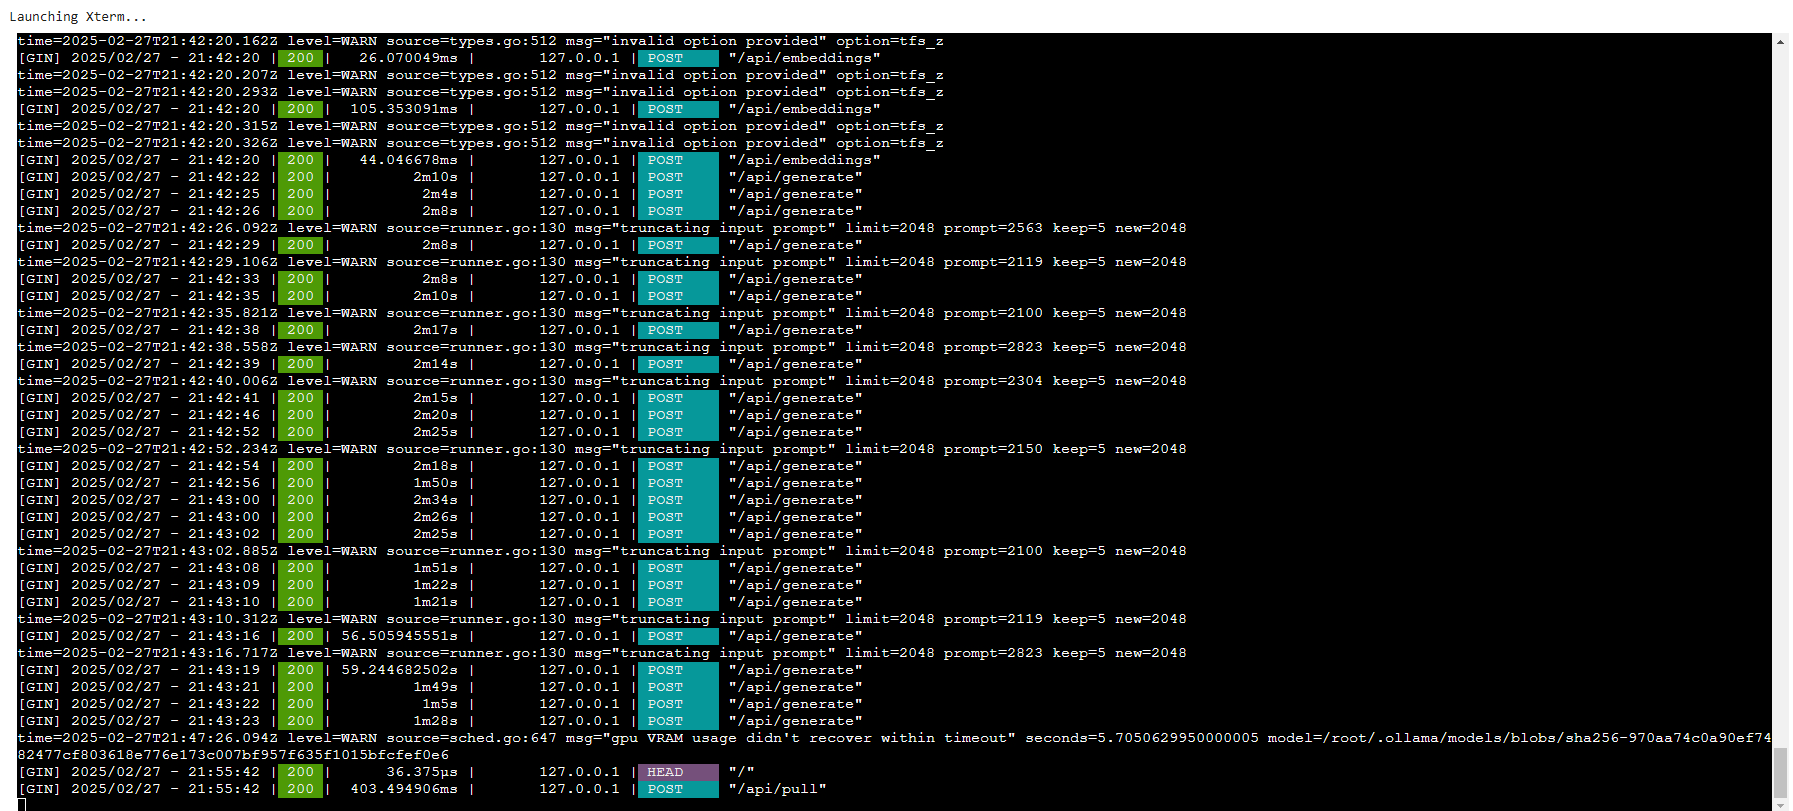

In [42]:
from datasets import Dataset
from tqdm.auto import tqdm

test_questions = test_df["question"].values

responses = [generate_response(query_engine, q) for q in tqdm(test_questions)]

dataset_dict = {
    "question": test_questions,
    "answer": [response["answer"] for response in responses],
    "contexts": [response["contexts"] for response in responses],
    "ground_truth": test_df["ground_truth"].values.tolist(),
}

ragas_eval_dataset = Dataset.from_dict(dataset_dict)

  0%|          | 0/13 [00:00<?, ?it/s]

100%
 13/13 [00:51<00:00,  4.37s/it]

In [43]:
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.llms import Ollama

from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_correctness,
    context_recall,
    context_precision,
)

In [44]:
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.llms import Ollama

from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_correctness,
    context_recall,
    context_precision,
)

In [ ]:

from datasets import Dataset

ragas_eval_dataset = Dataset.from_dict(dataset_dict)

metrics = [faithfulness, answer_correctness,
           context_recall, context_precision]

critic_llm = Ollama(model="llama3.2:1b")

ollama_emb = OllamaEmbeddings(model="nomic-embed-text")
subset_size = 4
ragas_eval_subset = ragas_eval_dataset.select(range(subset_size))

evaluation_result = evaluate(
    llm=critic_llm,
    embeddings=ollama_emb,
    dataset=ragas_eval_subset,
    metrics=metrics
)


Evaluating: 100%
 16/16 [04:37<00:00, 17.56s/it]

In [91]:
answer_correctness = pd.DataFrame(evaluation_result.scores).answer_correctness
answer_correctness

,answer_correctness
0,0.737351
1,0.616631
2,0.569760
3,0.738852
